3
3
[[ 1.23076923]
 [-0.30769231]]


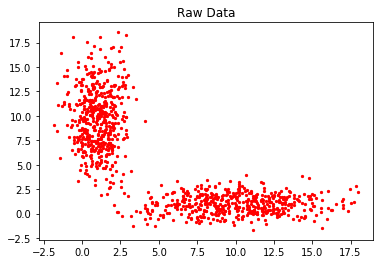

501
499
[[-0.00167251]
 [ 0.00164582]]
[[3.31071198e-07]]
[[0.00033107]]


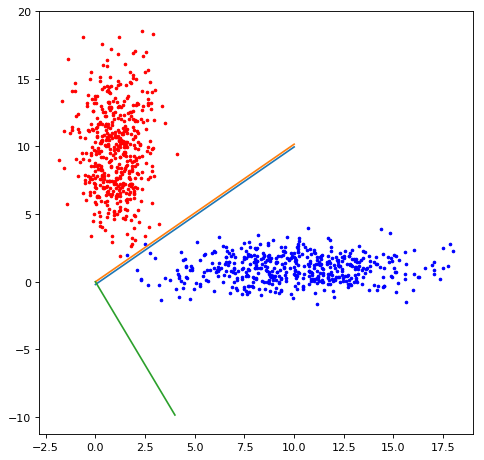

In [1]:
#实例识别图片中0和1
%matplotlib inline
import d2lzh as d2l
from mxnet.gluon import data as gdata
import numpy as np
import struct   #处理数据流
import sys
sys.path.append("..")
from matplotlib import pyplot as plt


#计算w,b
def parameter(x1,x2,p1=0.5,p2=0.5):
    
    num1=x1.shape[1]
    num2=x2.shape[1]
    print(num1)
    print(num2)
    u1=np.zeros((x1.shape[0],1))
    u2=np.zeros((x2.shape[0],1))
    for i in range(num1):
        u1=u1+(x1[:,i]).reshape(x1.shape[0],1)
    for i in range(num2):
        u2=u2+(x2[:,i]).reshape(x2.shape[0],1)
    u1=(1/num1)*u1
    u2=(1/num2)*u2
    s1=np.dot((x1-u1),(x1-u1).T)
    s2=np.dot((x2-u2),(x2-u2).T)
    sw=s1+s2
    sb=np.dot((u1-u2),(u1-u2).T)
    ww=np.dot(np.linalg.inv(sw),(u1-u2))
    b1=(-1/2)*(np.dot((np.dot(((u1+u2).T),((1/(num1+num2))*np.linalg.inv(sw)))),(u1-u2)))+(1/(num1+num2))*np.log(p1/p2)
    b2=(-1/2)*(np.dot(ww.T,u1)+np.dot(ww.T,u2))
    return ww,b1,b2

#生成数据
x1=[[1,2,2],[1,2,0]]
x2=[[0,1,0],[0,2,1]]
x1=np.array(x1)
x2=np.array(x2)
ww,b1,b2= parameter(x1,x2)
print(ww)
#print(b1)
#print(b2)


#生成两类正态样本
def genexam():
    z = [[[1.0, 0], [0, 10.0]],[[10.0, 0], [0, 1.0]]]
    u=[[1.0, 10.0],[10.0, 1.0]]
    a=[0.5,0.5]
    x1=[]
    x2=[]
    for i in range(1000):
        
        ui=np.random.multinomial(1,a,1)  #  按照给定的概率分布 决定 用哪个高斯分布生成样本
        ui=ui[0]
        if ui[0]==1:
            x1.append((np.random.multivariate_normal(u[0], z[0],1))[0]) #生成二维正态样本
            
        if ui[1]==1:
            x2.append((np.random.multivariate_normal(u[1], z[1],1))[0])
    x1=(np.array(x1).T)
    x2=(np.array(x2).T)
    x3=np.hstack((x1,x2)).T
    return x1,x2,x3

x1_T,x2_T,x3_T=genexam()

# 原始数据散点图
def draw(xx3):
    plt.scatter(xx3[:, 0],xx3[:, 1], s=5, c='r')
    plt.title('Raw Data')
    plt.show()
def draw2(xx1,xx2,w_T,b_T1,b_T2):
    fig = plt.figure(num=5, figsize=(7, 7),dpi=80) 
    ax1 = fig.add_subplot(1,1, 1)
    ax1.scatter(xx1[:, 0],xx1[:, 1], s=5, c='r')
    ax1.scatter(xx2[:, 0],xx2[:, 1], s=5, c='b')
   

    x = np.linspace(0, 10)
    y = (-w_T[0]*x-b_T2)/w_T[1]
    x1 = np.linspace(0,4)
    y1 = (w_T[1]*x)/w_T[0]
    x3 = np.linspace(0, 10)
    y3 = (-w_T[0]*x-b_T1)/w_T[1]
    
    ax1.plot(x, y[0])
    ax1.plot(x3, y3[0])
    ax1.plot(x1, y1)
    plt.show()
   
   
    
draw(x3_T)
w_T,b_T1,b_T2= parameter(x1_T,x2_T,0.5,0.5)
print(w_T)
print(b_T1)
print(b_T2)
draw2(x1_T.T,x2_T.T,w_T,b_T1,b_T2)

In [6]:
#print(np.log(np.e)(10))
#help(np.random.multinomial)
a=[0.4,0.6]
ui=np.random.multinomial(1,a,1)
print(ui[0])

[0 1]


In [37]:
 z=[[4/3,1],[1,4]]
print(np.linalg.inv(z))

[[ 0.92307692 -0.23076923]
 [-0.23076923  0.30769231]]
